In [1]:
import sys
import numpy as np
import cv2

In [2]:
#비디오 파일 열기
cap = cv2.VideoCapture("/Users/jungjihoon/Library/Mobile Documents/com~apple~CloudDocs/00_DataScience/민형기/PETS2000.avi")

if not cap.isOpened():
    print('can not read video')

In [3]:
#배경 차분 알고리즘 객체 생성
bs = cv2.createBackgroundSubtractorMOG2()
# bs = cv2.createBackgroundSubtractorKNN()
# bs.setDetectShadows(False)

In [4]:
while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    #영상 그레이 스케일 화
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # 전면 객체 마스크 생성
    fgmask = bs.apply(gray)
    # 배경 마스크 생성
    back = bs.getBackgroundImage()
    
    # 레이블링을 이용한 바운딩 표시
    cnt, _, stats, _ = cv2.connectedComponentsWithStats(fgmask)
    
    for i in range(0, cnt):
        x, y, w, h, s = stats[i]
        
        if s < 80:
            continue
        
        cv2.rectangle(frame, (x,y, w, h), (0, 0, 255), 2)
        
    cv2.imshow('frame', frame)
    cv2.imshow('back', back)
    cv2.imshow('fgmask', fgmask)
    
    if cv2.waitKey(20) == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

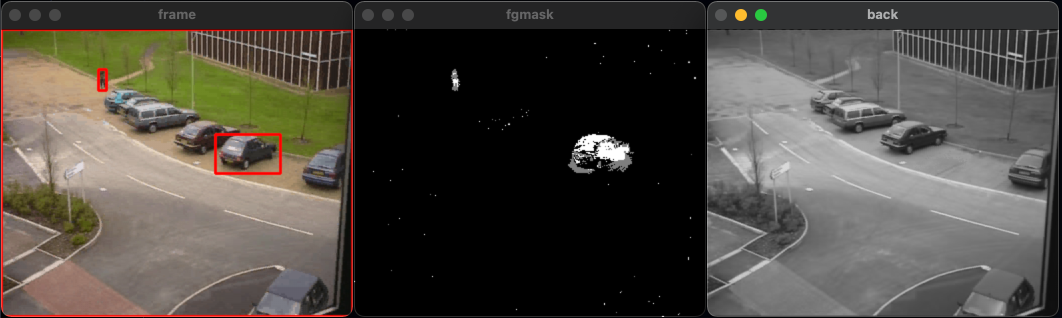
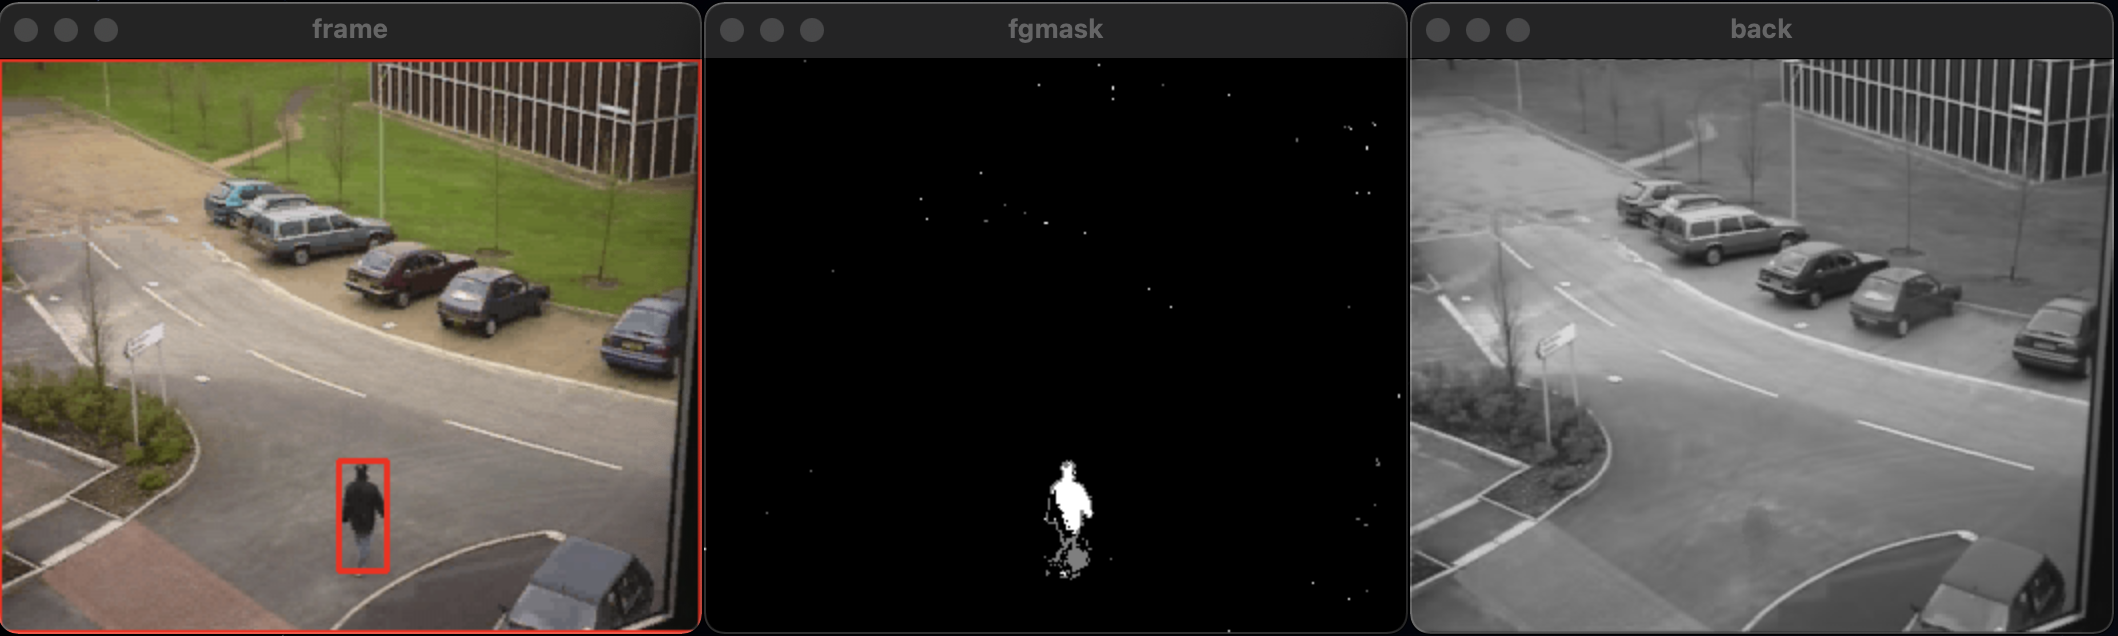